In [1]:
import numpy as np 
import xarray as xr

In [2]:
#for eofs we the following package
from eofs.xarray import Eof

In [4]:
#z500 monthly
f= '/pool/datos/reanalisis/era5/monthly/northern_hemisphere/075/z500/geo*.nc'
z500 =  xr.open_mfdataset(f,combine='by_coords',parallel=True).z.sel(time=slice('1940-01-01', '2022-12-31')).load()/9.806 #from geopotential to height
z500

<xarray.DataArray 'z' (time: 996, latitude: 121, longitude: 480)>
array([[[5207.9243, 5207.9243, 5207.9243, ..., 5207.9243, 5207.9243,
         5207.9243],
        [5218.29  , 5218.319 , 5218.3496, ..., 5218.1787, 5218.2173,
         5218.2505],
        [5226.4106, 5226.4556, 5226.497 , ..., 5226.2573, 5226.311 ,
         5226.364 ],
        ...,
        [5830.957 , 5830.909 , 5830.8853, ..., 5830.428 , 5830.534 ,
         5830.6704],
        [5830.701 , 5830.8716, 5830.904 , ..., 5830.299 , 5830.439 ,
         5830.5474],
        [5830.579 , 5830.8394, 5830.9893, ..., 5830.227 , 5830.428 ,
         5830.478 ]],

       [[5050.417 , 5050.417 , 5050.417 , ..., 5050.417 , 5050.417 ,
         5050.417 ],
        [5054.4014, 5054.5317, 5054.662 , ..., 5053.9976, 5054.1333,
         5054.267 ],
        [5059.3354, 5059.5854, 5059.8325, ..., 5058.576 , 5058.8315,
         5059.085 ],
...
        [5856.708 , 5856.6777, 5856.6626, ..., 5857.1084, 5856.9854,
         5856.8247],
        [5856.8306, 5856.788 , 5856.738 , ..., 5857.2983, 5857.1807,
         5857.0146],
        [5856.9707, 5856.9175, 5856.8955, ..., 5857.3706, 5857.294 ,
         5857.1704]],

       [[5178.2485, 5178.2485, 5178.2485, ..., 5178.2485, 5178.2485,
         5178.2485],
        [5184.819 , 5184.8115, 5184.8047, ..., 5184.8247, 5184.826 ,
         5184.8213],
        [5190.244 , 5190.2437, 5190.246 , ..., 5190.2207, 5190.23  ,
         5190.236 ],
        ...,
        [5845.9927, 5845.961 , 5845.8794, ..., 5846.3926, 5846.305 ,
         5846.0913],
        [5845.9385, 5845.909 , 5845.8467, ..., 5846.428 , 5846.334 ,
         5846.139 ],
        [5845.852 , 5845.7734, 5845.7246, ..., 5846.477 , 5846.345 ,
         5846.1357]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.2 -178.5 ... 177.8 178.5 179.2
  * latitude   (latitude) float32 90.0 89.25 88.5 87.75 ... 2.25 1.5 0.75 0.0
  * time       (time) datetime64[ns] 1940-01-31 1940-02-29 ... 2022-12-31

In [5]:
z500_seasonal = z500.resample(time='QS-DEC').mean(dim='time')
z500_djf = z500_seasonal[0::4]
z500_djf


<xarray.DataArray 'z' (time: 84, latitude: 121, longitude: 480)>
array([[[5129.171 , 5129.171 , 5129.171 , ..., 5129.171 , 5129.171 ,
         5129.171 ],
        [5136.3457, 5136.4253, 5136.506 , ..., 5136.088 , 5136.1753,
         5136.259 ],
        [5142.873 , 5143.0205, 5143.165 , ..., 5142.417 , 5142.5713,
         5142.7246],
        ...,
        [5835.04  , 5835.111 , 5835.214 , ..., 5834.66  , 5834.7803,
         5834.8623],
        [5834.9023, 5835.123 , 5835.2383, ..., 5834.509 , 5834.687 ,
         5834.7793],
        [5834.9062, 5835.187 , 5835.3154, ..., 5834.4043, 5834.6816,
         5834.7275]],

       [[5118.0063, 5118.0063, 5118.0063, ..., 5118.0063, 5118.0063,
         5118.0063],
        [5124.668 , 5124.602 , 5124.537 , ..., 5124.8555, 5124.7954,
         5124.733 ],
        [5130.4326, 5130.3027, 5130.1704, ..., 5130.8164, 5130.691 ,
         5130.563 ],
...
        [5855.7837, 5855.6704, 5855.485 , ..., 5856.439 , 5856.194 ,
         5855.9595],
        [5855.914 , 5855.807 , 5855.6523, ..., 5856.4224, 5856.244 ,
         5856.076 ],
        [5856.069 , 5855.935 , 5855.8237, ..., 5856.53  , 5856.414 ,
         5856.289 ]],

       [[5178.2485, 5178.2485, 5178.2485, ..., 5178.2485, 5178.2485,
         5178.2485],
        [5184.819 , 5184.8115, 5184.8047, ..., 5184.8247, 5184.826 ,
         5184.8213],
        [5190.244 , 5190.2437, 5190.246 , ..., 5190.2207, 5190.23  ,
         5190.236 ],
        ...,
        [5845.9927, 5845.961 , 5845.8794, ..., 5846.3926, 5846.305 ,
         5846.0913],
        [5845.9385, 5845.909 , 5845.8467, ..., 5846.428 , 5846.334 ,
         5846.139 ],
        [5845.852 , 5845.7734, 5845.7246, ..., 5846.477 , 5846.345 ,
         5846.1357]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.2 -178.5 ... 177.8 178.5 179.2
  * latitude   (latitude) float32 90.0 89.25 88.5 87.75 ... 2.25 1.5 0.75 0.0
  * time       (time) datetime64[ns] 1939-12-01 1940-12-01 ... 2022-12-01

In [6]:
#seasonal JJA anomalies 
z500_djf_anom = z500_djf - z500_djf.mean('time') 

#detrend
from scipy import signal
z500_djf_anom_dtrend = z500_djf_anom.copy(data=signal.detrend(z500_djf_anom,axis=0)) 

#select the North atlantic area
z500_DJF_Natl = z500_djf_anom_dtrend.sel(latitude=slice(70,20),longitude=slice(-90,40)) 
weights = np.sqrt(np.cos(np.deg2rad(z500_DJF_Natl.latitude))).squeeze()

In [7]:
z500_DJF_Natl

<xarray.DataArray 'z' (time: 84, latitude: 67, longitude: 174)>
array([[[ 1.01445473e+02,  1.01002785e+02,  1.00465843e+02, ...,
         -1.76498070e+01, -1.85606556e+01, -1.93942890e+01],
        [ 9.94087906e+01,  9.89939270e+01,  9.84268723e+01, ...,
         -2.05579166e+01, -2.14087448e+01, -2.22362404e+01],
        [ 9.66082230e+01,  9.61715393e+01,  9.56453400e+01, ...,
         -2.45161400e+01, -2.53000145e+01, -2.59597683e+01],
        ...,
        [-1.97349930e+01, -1.95738945e+01, -1.93498898e+01, ...,
         -5.42899513e+00, -5.68558884e+00, -6.12811661e+00],
        [-1.68459587e+01, -1.66265488e+01, -1.64157162e+01, ...,
         -5.10523224e+00, -5.39754868e+00, -5.89729309e+00],
        [-1.39899216e+01, -1.38366308e+01, -1.35252371e+01, ...,
         -4.88865089e+00, -5.16523361e+00, -5.52745819e+00]],

       [[ 1.83871307e+01,  1.78920345e+01,  1.74380951e+01, ...,
         -4.18631897e+01, -4.31409531e+01, -4.43713608e+01],
        [ 2.07562428e+01,  2.02662334e+01,  1.98527851e+01, ...,
         -4.76479836e+01, -4.89716530e+01, -5.02911835e+01],
        [ 2.36593647e+01,  2.32218380e+01,  2.28132801e+01, ...,
         -5.28874664e+01, -5.42774620e+01, -5.55867538e+01],
...
         -1.42738342e-01,  9.81962204e-01,  1.84275246e+00],
        [ 4.18935108e+00,  3.92143726e+00,  3.65672207e+00, ...,
          7.31182098e-02,  1.03569221e+00,  1.91282654e+00],
        [ 3.32133198e+00,  3.08395767e+00,  2.81443310e+00, ...,
          1.14387512e-01,  9.86265182e-01,  1.85632133e+00]],

       [[ 8.92725449e+01,  9.43654785e+01,  9.95629272e+01, ...,
          7.11686630e+01,  7.37366943e+01,  7.63538818e+01],
        [ 9.05983658e+01,  9.62480927e+01,  1.01957527e+02, ...,
          6.60510254e+01,  6.88584366e+01,  7.16771240e+01],
        [ 9.23678818e+01,  9.84531784e+01,  1.04639351e+02, ...,
          6.24215889e+01,  6.53389816e+01,  6.82839890e+01],
        ...,
        [ 8.49056339e+00,  8.61171532e+00,  8.64150143e+00, ...,
         -1.40402145e+01, -1.44598141e+01, -1.50345516e+01],
        [ 6.97996998e+00,  7.15786839e+00,  7.19609547e+00, ...,
         -1.53438473e+01, -1.58210812e+01, -1.61987686e+01],
        [ 5.43974781e+00,  5.64984131e+00,  5.82703114e+00, ...,
         -1.63552208e+01, -1.66076450e+01, -1.68518162e+01]]],
      dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -90.0 -89.25 -88.5 ... 38.25 39.0 39.75
  * latitude   (latitude) float32 69.75 69.0 68.25 67.5 ... 21.75 21.0 20.25
  * time       (time) datetime64[ns] 1939-12-01 1940-12-01 ... 2022-12-01

In [8]:
from eofs.xarray import Eof

# create a solver class, taking advantage of built-in weighting
solver = Eof(z500_DJF_Natl.transpose("time", "longitude", "latitude"), center=True, weights=weights)

# retrieve the first two EOFs from the solver class
eofs = solver.eofs(neofs=12).transpose("mode", "latitude", "longitude")
eofs_cov = solver.eofsAsCovariance(neofs=12,pcscaling=1).transpose("mode", "latitude", "longitude")
pcs = solver.pcs(npcs=12, pcscaling=1)

var_frac = solver.varianceFraction(neigs=12) #explained varience

In [9]:
np.sum(var_frac)

<xarray.DataArray 'variance_fractions' ()>
array(0.96813434, dtype=float32)

In [13]:
#standarize pcs
PCS_djf_std = (pcs - pcs.mean('time')) / pcs.std('time')
PCS_djf_std


<xarray.DataArray 'pcs' (time: 84, mode: 12)>
array([[-1.5073799 ,  0.86571485, -1.4438182 , ..., -0.8608605 ,
         1.1140271 , -0.16732985],
       [-0.82219756, -0.16890925,  0.58025414, ...,  0.7216152 ,
         1.715929  ,  0.3282071 ],
       [-0.34238014, -1.3609644 , -0.6900422 , ..., -0.38230452,
         0.5877679 , -0.1953495 ],
       ...,
       [-1.4743065 , -0.20895411,  0.83347636, ...,  0.23641914,
         0.03491174,  1.1351831 ],
       [ 0.99773204, -0.76155394, -0.27954838, ..., -2.175095  ,
        -0.6910293 , -0.40387994],
       [-2.5836227 , -0.5434953 ,  2.665548  , ...,  0.19172187,
         0.52554965,  0.02086367]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1939-12-01 1940-12-01 ... 2022-12-01
  * mode     (mode) int64 0 1 2 3 4 5 6 7 8 9 10 11

In [16]:
#regress the index onto the SST field everywhere
lats, lons, modes = z500_djf_anom.latitude, z500_djf_anom.longitude, np.arange(0,10)
regressed_map = xr.DataArray(np.empty([10, *z500_djf_anom[0,:,:].shape]), coords=(modes,lats,lons),dims=['mode','lat','lon'])

for i,lat in enumerate(lats):
    for j,mode in enumerate(modes):
        regressed_map[j,i,:] = np.polyfit(PCS_djf_std[:,j],z500_djf_anom[:,i,:],1)[0] #first coeficient is the regression slope

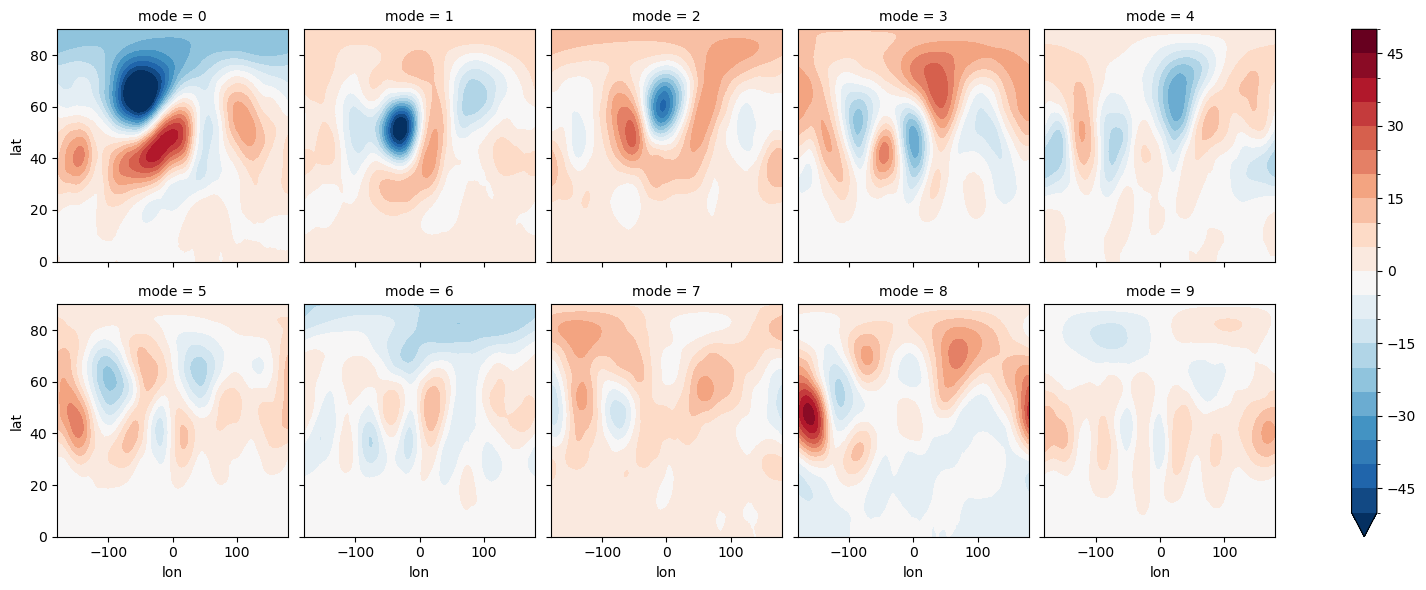

In [24]:
regressed_map.plot.contourf(col='mode', col_wrap=5, levels=np.arange(-50,51,5))

In [69]:
plt.contourf?

Signature: plt.contourf(*args, data=None, **kwargs) -> 'QuadContourSet'
Docstring:
Plot filled contours.

Call signature::

    contourf([X, Y,] Z, [levels], **kwargs)

`.contour` and `.contourf` draw contour lines and filled contours,
respectively.  Except as noted, function signatures and return values
are the same for both versions.

Parameters
----------
X, Y : array-like, optional
    The coordinates of the values in *Z*.

    *X* and *Y* must both be 2D with the same shape as *Z* (e.g.
    created via `numpy.meshgrid`), or they must both be 1-D such
    that ``len(X) == N`` is the number of columns in *Z* and
    ``len(Y) == M`` is the number of rows in *Z*.

    *X* and *Y* must both be ordered monotonically.

    If not given, they are assumed to be integer indices, i.e.
    ``X = range(N)``, ``Y = range(M)``.

Z : (M, N) array-like
    The height values over which the contour is drawn.  Color-mapping is
    controlled by *cmap*, *norm*, *vmin*, and *vmax*.

levels : int or arr

/tmp/ipykernel_688781/2659026686.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = mpl.cm.get_cmap('RdBu_r', 256)


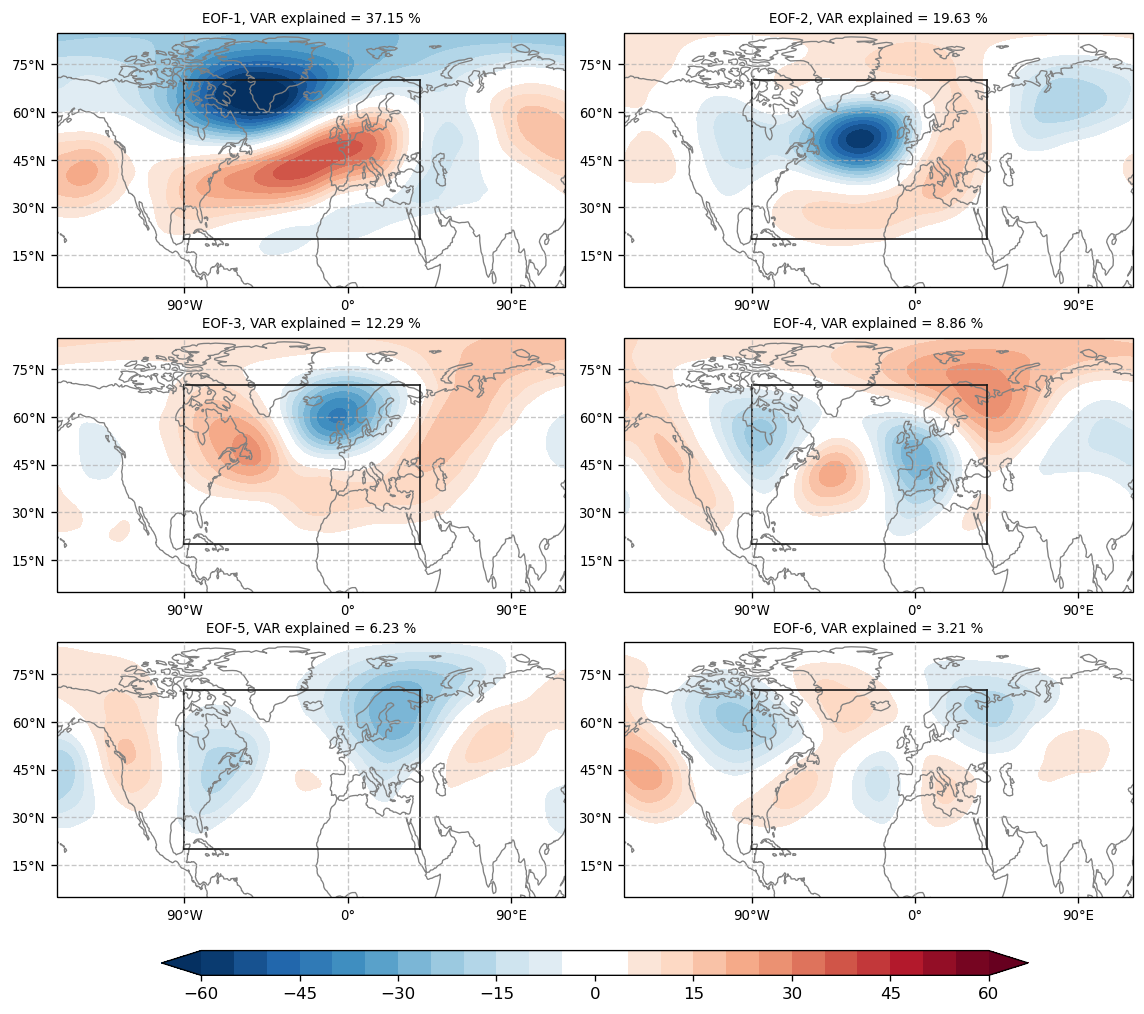

In [95]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

plt.rcParams['figure.dpi'] = 120
mpl.rcParams['figure.figsize'] = 7, 7

# Create subplots with shared y-axis and manually share x-axis
f, axes = plt.subplots(3, 2, sharey=True, sharex=True, figsize=(9.5,10), subplot_kw=dict(projection=ccrs.PlateCarree(central_longitude=0.0, globe=None)))

lev = np.arange(-60,61,5)
colors = mpl.cm.get_cmap('RdBu_r', 256)
newcolors = colors(np.linspace(0, 1, 256))
white = np.array([1, 1, 1, 1])
newcolors[120:137, :] = white
newcmap = mpl.colors.ListedColormap(newcolors)

lat, lon = z500_djf_anom.latitude, z500_djf_anom.longitude
nLons = np.arange(-180, 181, 90)
nLats = np.arange(-90, 91, 15)

# Loop through subplots
for i, ax in enumerate(axes.flatten()):

    ax.set_title(f"EOF-{i+1}, VAR explained = "+"{:.2f}".format((var_frac.sel(mode=i)*100).values)+' %', fontsize=8)
    
    # EOF region
    ax.plot([-90, 40], [20, 20], lw='1.0', ls='-', color='0.1', transform=ccrs.PlateCarree())
    ax.plot([-90, 40], [70, 70], lw='1.0', ls='-', color='0.1', transform=ccrs.PlateCarree())
    ax.plot([-90, -90], [20, 70], lw='1.0', ls='-', color='0.1', transform=ccrs.PlateCarree())
    ax.plot([40, 40], [20, 70], lw='1.0', ls='-', color='0.1', transform=ccrs.PlateCarree())

    ax.set_xticks(nLons, crs=ccrs.PlateCarree())
    ax.set_yticks(nLats, crs=ccrs.PlateCarree())
    ax.tick_params(axis='both', which='major', labelsize=8)
    ax.set_ylim([5, 85])
    ax.set_xlim([-160, 120])
   
    ax.set_facecolor('0.8')
    ax.coastlines(lw=0.8, color='grey')  
    ax.gridlines(linestyle='--', zorder=3, alpha=0.7, xlocs=nLons, ylocs=nLats)

    # format the ticks as e.g 60°W
    ax.xaxis.set_major_formatter(LongitudeFormatter())
    ax.yaxis.set_major_formatter(LatitudeFormatter())

    ax.set_aspect(1.75)

    # Explicitly pass the ax parameter to contourf
    h = ax.contourf(lon, lat, regressed_map[i], cmap=newcmap, levels=lev, extend='both', alpha=1.0) 

# Adjust size
f.subplots_adjust(hspace=0.2, wspace=0.1, left=0.0, right=0.95, bottom=0.05, top=0.95)

# Add common colorbar
cbar = plt.colorbar(h, ax=axes, label='', pad=0.05, orientation='horizontal', shrink=0.8, aspect=35)

#save figure
plt.savefig('DJF_eofs_NAtlantic.pdf',bbox_inches='tight')

In [43]:
import numpy as np
import xarray as xr
from scipy import signal
from eofs.xarray import Eof

def compute_eofs_pcs_regressed(field, num_pcs, season='year-round', region=None):
    """
    Compute EOFs, standardized PCs, and regressed patterns.

    Parameters
    ----------
    field : xarray.DataArray
        The input field.
    num_pcs : int
        The number of Principal Components (PCs) to compute.
    season : str, optional
        The season for anomaly calculation ('year-round', 'DJF', 'MAM', 'JJA', 'SON').
    region : tuple, optional
        The region to select (latitude_s, latitude_n, longitude_w, longitude_e).

    Returns
    -------
    eofs : xarray.DataArray
        EOF patterns.
    pcs : xarray.DataArray
        Standardized PCs.
    regressed_map : xarray.DataArray
        Regressed patterns.

    """
    # Select season
    if season == 'year-round':
        field_season = field
    else:
        field_season = field.where(field['time.season'] == season)

    # Drop missing values
    field_season = field_season.dropna(dim='time', how='any')

    # Seasonal anomalies
    field_anom = field_season - field_season.mean('time')

    # Detrend
    field_anom_dtrend = field_anom.copy(data=signal.detrend(field_anom, axis=0))

    # Select region
    if region is not None:
        lat_s, lat_n, lon_w, lon_e = region
        field_anom_dtrend = field_anom_dtrend.sel(lat=slice(lat_s, lat_n), lon=slice(lon_w, lon_e))

    # Compute weights
    weights = np.sqrt(np.cos(np.deg2rad(field_anom_dtrend.lat))).squeeze()

    # Create solver class
    solver = Eof(field_anom_dtrend.transpose("time", "lon", "lat"), center=True, weights=weights)

    # Retrieve EOFs, PCs, and variance fraction
    eofs = solver.eofs(neofs=num_pcs).transpose("mode", "lat", "lon")
    pcs = solver.pcs(npcs=num_pcs, pcscaling=1)
    var_frac = solver.varianceFraction(neigs=num_pcs)

    # Standardize PCs
    pcs_std = (pcs - pcs.mean('time')) / pcs.std('time')

    var_frac = solver.varianceFraction(neigs=12) #explained varience

    # Regress the index onto the field
    lats, lons, modes = field_anom.lat, field_anom.lon, np.arange(num_pcs)
    regressed_map = xr.DataArray(np.empty([num_pcs, *field_anom[0, :, :].shape]),
                                 coords=(modes, lats, lons), dims=['mode', 'lat', 'lon'])

    for i, lat in enumerate(lats):
        for j, mode in enumerate(modes):
            regressed_map[j, i, :] = np.polyfit(pcs_std[:, j], field_anom[:, i, :], 1)[0]

    return eofs, pcs_std, var_frac, regressed_map


In [ ]:
# Example usage:
# Assuming 'your_field' is your xarray DataArray
eofs_med, pcs_med, var_frac_med, regressed_map_med = compute_eofs_pcs_regressed(z500, num_pcs=10, season='JJA', region=(25, 50, -15, 40))
eofs_natl, pcs_natl, var_frac_natl, regressed_map_natl = compute_eofs_pcs_regressed(z500, num_pcs=10, season='JJA', region=(20, 70, -90, 40))

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

def plot_eofs_pcs_regressed(eofs, pcs, regressed_map, var_frac, eof_region, nLons, nLats, title_prefix='', save_path=None):
    """
    Plot EOFs, standardized PCs, and regressed patterns.

    Parameters
    ----------
    eofs : xarray.DataArray
        EOF patterns.
    pcs : xarray.DataArray
        Standardized PCs.
    regressed_map : xarray.DataArray
        Regressed patterns.
    var_frac : xarray.DataArray
        Fraction of explained variance.
    nLons : numpy.ndarray
        Longitudes for ticks.
    nLats : numpy.ndarray
        Latitudes for ticks.
    title_prefix : str, optional
        Prefix for subplot titles.
    save_path : str, optional
        Path to save the plot.

    """
    plt.rcParams['figure.dpi'] = 120
    mpl.rcParams['figure.figsize'] = 7, 7

    # Create subplots with shared y-axis and manually share x-axis
    f, axes = plt.subplots(3, 2, sharey=True, sharex=True, figsize=(9.5, 10),
                           subplot_kw=dict(projection=ccrs.PlateCarree(central_longitude=0.0, globe=None)))

    lev = np.arange(-8, 8.1, 0.5)
    colors = mpl.cm.get_cmap('RdBu_r', 256)
    newcolors = colors(np.linspace(0, 1, 256))
    white = np.array([1, 1, 1, 1])
    newcolors[120:137, :] = white
    newcmap = mpl.colors.ListedColormap(newcolors)

    lat, lon = regressed_map.lat, regressed_map.lon

    # Loop through subplots
    for i, ax in enumerate(axes.flatten()):

        ax.set_title(f"{title_prefix}EOF-{i + 1}, VAR explained = " +
                     "{:.2f}".format((var_frac.sel(mode=i) * 100).values) + ' %', fontsize=8)

        # EOF region
        latS, latN, lonW, lonE = eof_region
        ax.plot([lonW, lonE], [latS, latS], lw='1.0', ls='-', color='0.1', transform=ccrs.PlateCarree())
        ax.plot([lonW, lonE], [latN, latN], lw='1.0', ls='-', color='0.1', transform=ccrs.PlateCarree())
        ax.plot([lonW, lonW], [latS, latN], lw='1.0', ls='-', color='0.1', transform=ccrs.PlateCarree())
        ax.plot([lonE, lonE], [latS, latN], lw='1.0', ls='-', color='0.1', transform=ccrs.PlateCarree())

        ax.set_xticks(nLons, crs=ccrs.PlateCarree())
        ax.set_yticks(nLats, crs=ccrs.PlateCarree())
        ax.tick_params(axis='both', which='major', labelsize=8)
        ax.set_ylim([10, 70])
        ax.set_xlim([-90, 120])

        ax.set_facecolor('0.8')
        ax.coastlines(lw=0.8, color='grey')
        ax.gridlines(linestyle='--', zorder=3, alpha=0.7, xlocs=nLons, ylocs=nLats)

        # format the ticks as e.g 60°W
        ax.xaxis.set_major_formatter(LongitudeFormatter())
        ax.yaxis.set_major_formatter(LatitudeFormatter())

        ax.set_aspect(1.75)

        # Explicitly pass the ax parameter to contourf
        h = ax.contourf(lon, lat, regressed_map[i], cmap=newcmap, levels=lev, extend='both', alpha=1.0)

    # Adjust size
    f.subplots_adjust(hspace=0.2, wspace=0.1, left=0.0, right=0.95, bottom=0.05, top=0.95)

    # Add common colorbar
    cbar = plt.colorbar(h, ax=axes, label='', pad=0.05, orientation='horizontal', shrink=0.8, aspect=35)

    if save_path is not None:
        plt.savefig(save_path, bbox_inches='tight')

    plt.show()

In [ ]:
# Example usage:
plot_eofs_pcs_regressed(eofs_med, pcs_med, regressed_map_med, var_frac_med, (25, 50, -15, 40), nLons, nLats, 'JJA_', 'EOFs_JJA_med.pdf')


/tmp/ipykernel_688781/327094014.py:39: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = mpl.cm.get_cmap('RdBu_r', 256)


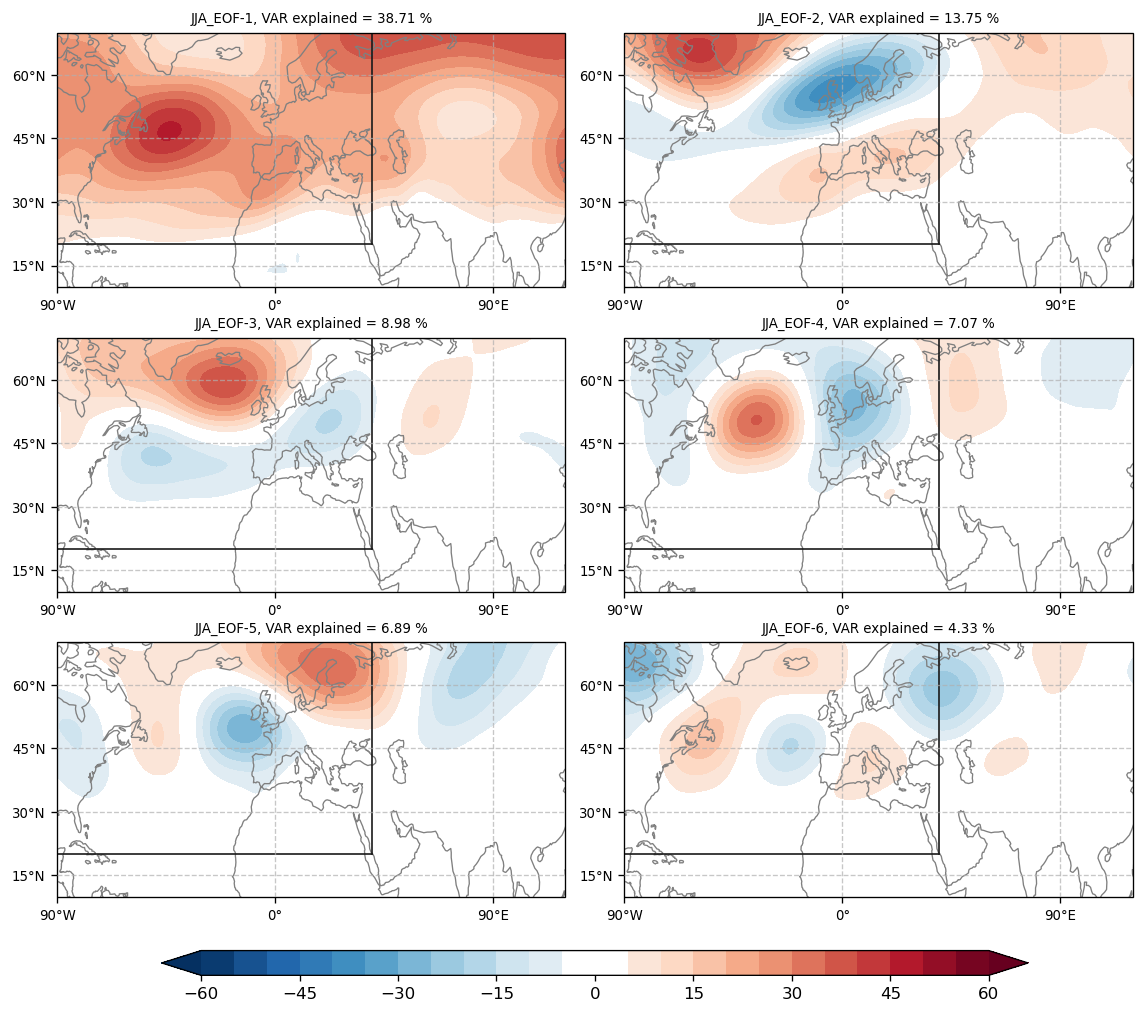

In [122]:
plot_eofs_pcs_regressed(eofs_natl, pcs_natl, regressed_map_natl, var_frac_natl, (20, 70, -90, 40), nLons, nLats, 'JJA_', 'EOFs_JJA_natl.pdf')

# Daily means of 20C ERA realsysis
 let's now try doing the same with daily mean MSLP data 

In [8]:
# monthly
f= '/home/bernatj/Data/my_data/ERA20C/6hourly/mslp/mslp-era20c-6h-*.nc'
mslp =  xr.open_mfdataset(f).msl.load()
mslp



<xarray.DataArray 'msl' (time: 160708, latitude: 73, longitude: 144)>
array([[[101974.555, 101974.555, 101974.555, ..., 101974.555,
         101974.555, 101974.555],
        [101769.31 , 101774.57 , 101780.24 , ..., 101758.81 ,
         101760.49 , 101764.91 ],
        [101718.06 , 101717.22 , 101716.17 , ..., 101716.17 ,
         101718.06 , 101718.266],
        ...,
        [100802.984, 100800.26 , 100796.9  , ..., 100840.17 ,
         100821.89 , 100812.86 ],
        [100633.25 , 100608.88 , 100583.88 , ..., 100706.77 ,
         100681.15 , 100657.41 ],
        [100444.6  , 100444.6  , 100444.6  , ..., 100444.6  ,
         100444.6  , 100444.6  ]],

       [[101644.95 , 101644.95 , 101644.95 , ..., 101644.95 ,
         101644.95 , 101644.95 ],
        [101445.38 , 101453.79 , 101462.195, ..., 101424.375,
         101429.84 , 101437.41 ],
        [101392.87 , 101408.2  , 101423.12 , ..., 101331.734,
         101349.38 , 101371.234],
...
        [ 99986.22 , 100003.2  , 100020.195, ...,  99933.16 ,
          99952.664,  99969.44 ],
        [100041.586, 100049.34 , 100057.32 , ..., 100023.55 ,
         100026.484, 100034.04 ],
        [100192.59 , 100192.59 , 100192.59 , ..., 100192.59 ,
         100192.59 , 100192.59 ]],

       [[101961.47 , 101961.47 , 101961.47 , ..., 101961.47 ,
         101961.47 , 101961.47 ],
        [102065.914, 102094.44 , 102122.96 , ..., 101969.65 ,
         101998.8  , 102032.35 ],
        [102195.31 , 102258.02 , 102319.9  , ..., 101947.2  ,
         102027.53 , 102111.63 ],
        ...,
        [100098.84 , 100112.055, 100125.06 , ..., 100050.4  ,
         100068.64 , 100083.95 ],
        [100137.44 , 100147.29 , 100157.78 , ..., 100109.96 ,
         100115.83 , 100126.53 ],
        [100428.96 , 100428.96 , 100428.96 , ..., 100428.96 ,
         100428.96 , 100428.96 ]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 0.0 2.5 5.0 7.5 ... 350.0 352.5 355.0 357.5
  * latitude   (latitude) float32 90.0 87.5 85.0 82.5 ... -85.0 -87.5 -90.0
  * time       (time) datetime64[ns] 1900-01-01 ... 2009-12-31T18:00:00
Attributes:
    units:          Pa
    long_name:      Mean sea level pressure
    standard_name:  air_pressure_at_mean_sea_level

In [9]:
#calculate the daily means
mslp_dm = mslp.resample(time='1D').mean('time')


In [10]:
mslp_mm =  mslp_dm.resample(time='1M').mean('time')

In [35]:
import sys
sys.path.append('/home/bernatj/')

from Scripts.useful_fuctions.python_functions import fix_data_format

mslp_mm = fix_data_format(mslp_mm)

In [44]:
mslp_mm

<xarray.DataArray 'msl' (time: 1320, lat: 73, lon: 144)>
array([[[101123.1  , 101123.1  , 101123.1  , ..., 101123.1  ,
         101123.1  , 101123.1  ],
        [100651.805, 100647.09 , 100644.305, ..., 100679.85 ,
         100671.05 , 100660.766],
        [ 99974.73 ,  99953.22 ,  99950.58 , ..., 100016.13 ,
          99997.31 ,  99984.81 ],
        ...,
        [101967.35 , 101960.62 , 101952.91 , ..., 101981.78 ,
         101977.55 , 101973.16 ],
        [101573.83 , 101570.016, 101565.92 , ..., 101586.95 ,
         101583.56 , 101579.05 ],
        [101289.96 , 101289.96 , 101289.96 , ..., 101289.96 ,
         101289.96 , 101289.96 ]],

       [[101530.61 , 101530.61 , 101530.61 , ..., 101530.61 ,
         101530.61 , 101530.61 ],
        [101058.79 , 101056.92 , 101057.82 , ..., 101090.63 ,
         101080.6  , 101069.07 ],
        [100638.51 , 100635.6  , 100642.83 , ..., 100660.93 ,
         100644.76 , 100641.336],
...
        [100755.6  , 100746.625, 100740.26 , ..., 100788.9  ,
         100775.74 , 100765.73 ],
        [100832.59 , 100826.84 , 100821.945, ..., 100858.016,
         100849.164, 100840.68 ],
        [100984.914, 100984.914, 100984.914, ..., 100984.914,
         100984.914, 100984.914]],

       [[ 99671.516,  99671.516,  99671.516, ...,  99671.516,
          99671.516,  99671.516],
        [ 99386.73 ,  99391.086,  99397.28 , ...,  99388.8  ,
          99389.29 ,  99387.54 ],
        [ 98881.484,  98868.734,  98868.41 , ...,  98910.07 ,
          98903.79 ,  98891.51 ],
        ...,
        [102751.2  , 102757.17 , 102762.2  , ..., 102725.44 ,
         102734.164, 102742.89 ],
        [102642.695, 102645.11 , 102647.54 , ..., 102636.3  ,
         102639.01 , 102640.93 ],
        [102599.64 , 102599.64 , 102599.64 , ..., 102599.64 ,
         102599.64 , 102599.64 ]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -90.0 -87.5 -85.0 -82.5 -80.0 ... 82.5 85.0 87.5 90.0
  * time     (time) datetime64[ns] 1900-01-31 1900-02-28 ... 2009-12-31
  * lon      (lon) float32 -177.5 -175.0 -172.5 -170.0 ... 175.0 177.5 180.0
Attributes:
    units:          Pa
    long_name:      Mean sea level pressure
    standard_name:  air_pressure_at_mean_sea_level

In [45]:
eofs_med, pcs_med, var_frac_med, regressed_map_med = compute_eofs_pcs_regressed(mslp_mm*0.01, num_pcs=10, season='DJF', region=(25, 50, -15, 40))
eofs_natl, pcs_natl, var_frac_natl, regressed_map_natl = compute_eofs_pcs_regressed(mslp_mm*0.01, num_pcs=10, season='DJF', region=(20, 70, -90, 40))

/tmp/ipykernel_3927200/1565526731.py:39: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = mpl.cm.get_cmap('RdBu_r', 256)


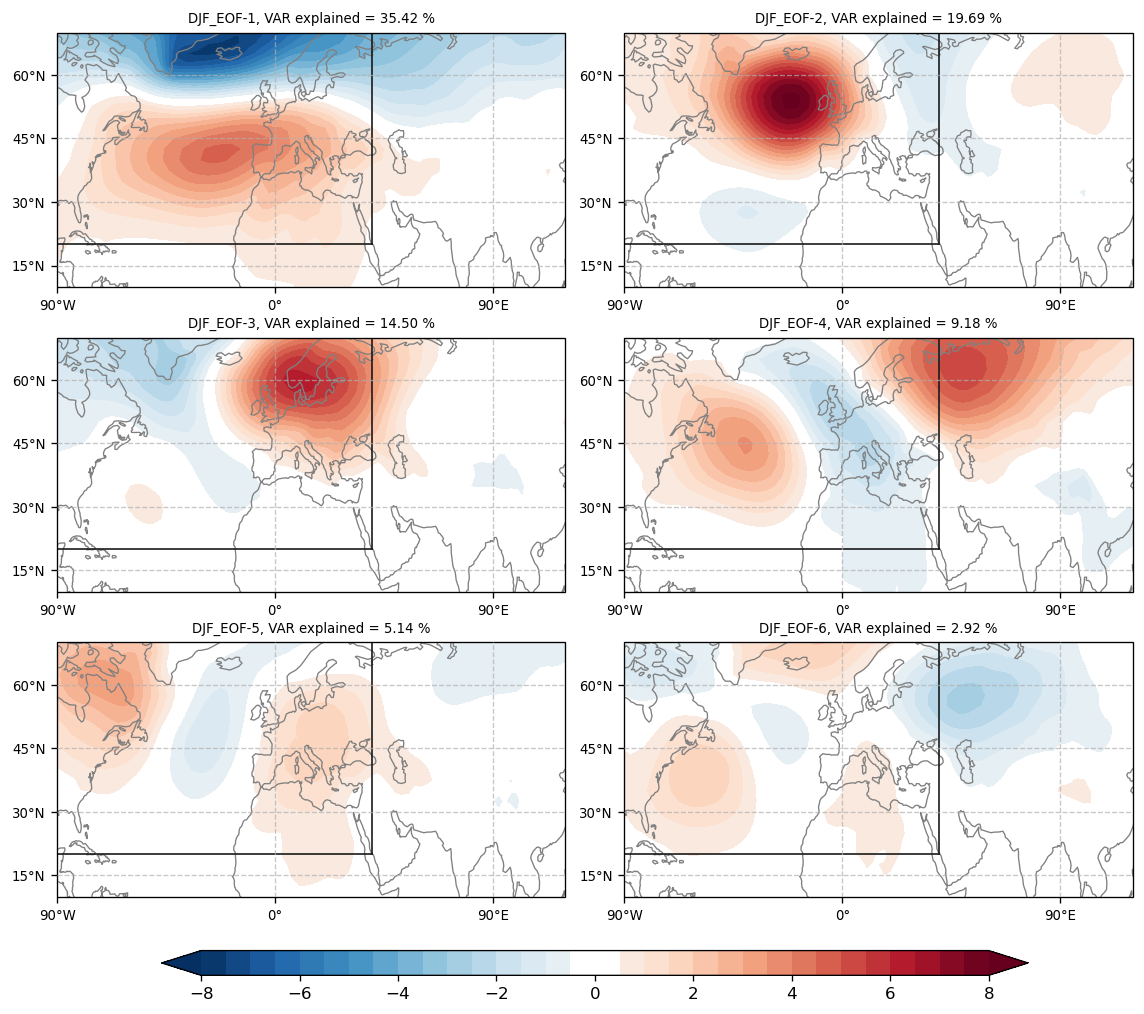

In [51]:
nLons = np.arange(-180, 181, 90)
nLats = np.arange(-90, 91, 15)

plot_eofs_pcs_regressed(eofs_natl, pcs_natl, regressed_map_natl, var_frac_natl, (20, 70, -90, 40), nLons, nLats, 'DJF_', 'EOFs_DJF_natl_SLP_ERA0C.pdf')

/tmp/ipykernel_3927200/1565526731.py:39: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = mpl.cm.get_cmap('RdBu_r', 256)


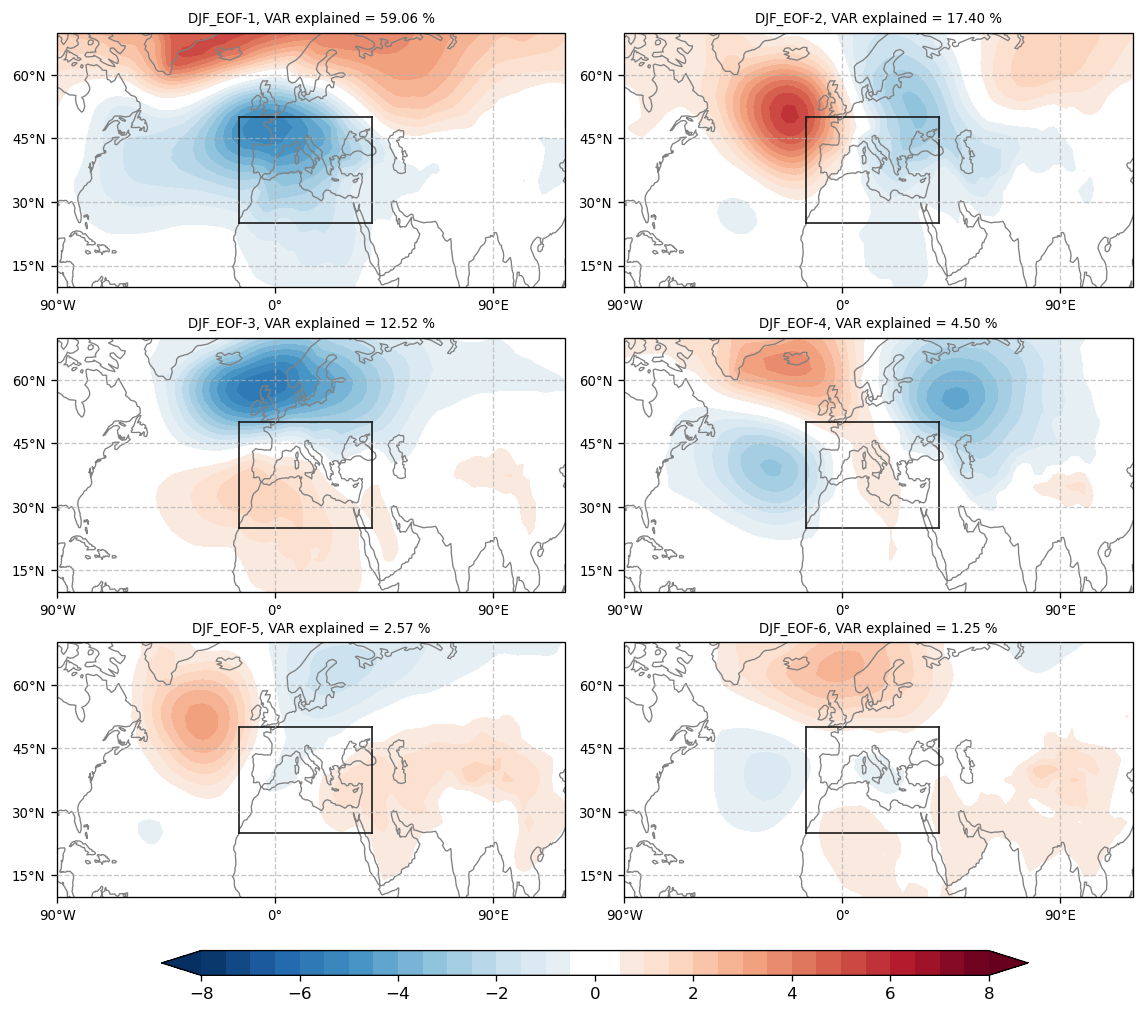

In [50]:
plot_eofs_pcs_regressed(eofs_med, pcs_med, regressed_map_med, var_frac_med, (25, 50, -15, 40), nLons, nLats, 'DJF_', 'EOFs_seaonal_DJF_med_SLP_ERA20C.pdf')